# K means clustering 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

First create some artbitory data

In [77]:
mean_1 = [-5, -5]
cov_1 = [[1, 0], [0, 1]]  # diagonal covariance
mean_2 = [5, 5]
cov_2 = [[1, 0], [0, 1]]  # diagonal covariance 

C_1 = np.random.multivariate_normal(mean_1, cov_1, 50)
C_2 = np.random.multivariate_normal(mean_2, cov_2, 50)
X = np.vstack((C_1, C_2)) # (1000,2) all datapoints
n = X.shape[0] # number of datapoints
d = 2 # dimension of each data point

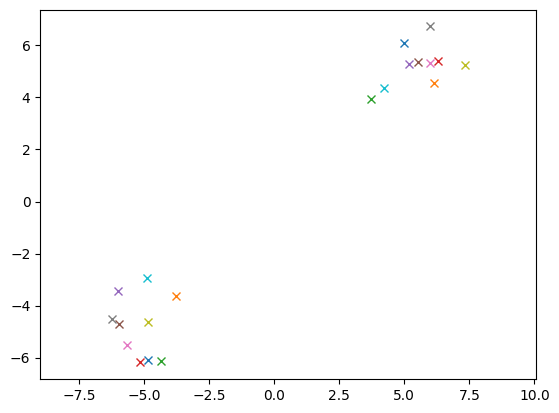

In [20]:
x_1, y_1 = C_1.T
x_2, y_2 = C_2.T
plt.plot(np.stack((x_1, x_2)),  np.stack((y_1, y_2)), 'x')
plt.axis('equal')
plt.show()

Lets start with kmeans++ initialization

- first problem is do we consider duplicates? or points that the exact same number -> lets assume this could be true

In [52]:
def l2norm_squared(x, x_):
    return np.sum(np.square(x-x_))

def kmean_plus_plus(k,X):
  '''
  k-means++ init

  @returns
    - centers: idx for X, where the idx corrspound to clusters 
    - cluster assignment

  '''


  n = X.shape[0] # number of datapoints
  d = 2 # dimension of each data point


  centers = set()

  # say when we have two pts with same numbers ie [1,1] and [1,1], when one is picked
  # and when we check whether the second pt that hasnt been picked, won't think it has been picked already
  # it also saves memory since x_i could be high dimension and storing it in a set when we have high k might be even more expensive
  # note we dont have to store the actual x_i s, we can just store it's index

  # first pick a random pt unifomrally
  x_i = np.random.randint(low= 0, high = n-1)
  centers.add(x_i)

  k -= 1


  while k > 0:
      dist_all = []

      # for all x not chosen
      for i in range(n):
          if i in centers: continue

          # find closests center
          dist = np.inf
          closests_cluster = 0
          for j, c_j in enumerate(centers):
              dist_ = l2norm_squared(X[i], X[c_j] ) #X[i] current point, X[c_j] center point
              if dist_ < dist: closests_cluster = c_j
              dist = min(dist, dist_ )
          
          # append dist to closest cluster and cluster assignment
          dist_all.append(dist)

      # pick a new point weighted by probability
      c_new = random.choices(
      population = [i for i in range(n) if i not in centers],
      weights= dist_all ,
      k=1
      )

      centers.add(c_new[0])
      k -= 1



  return centers

centers = kmean_plus_plus(2, X)

Plot the centers in example

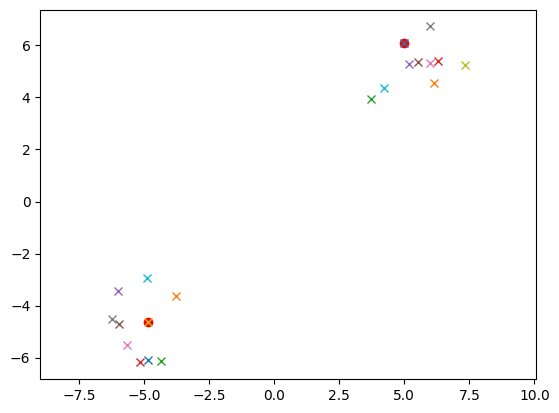

In [29]:
plt.plot(np.stack((x_1, x_2)),  np.stack((y_1, y_2)), 'x')


# get the two clusters out
c_1 = X[list(centers)[0]]
c_2 = X[list(centers)[1]]
plt.scatter(c_1[0],c_1[1], color='red')
plt.scatter(c_2[0],c_2[1], color='red')


plt.axis('equal')
plt.show()

# K means

In [76]:
def reassign_cluster(C_mu, X):
  '''
  reassign data points to a cluster

  @return:
    A: dict that maps A[cluster number] = [idx in X,... ]
  '''
  tmp = np.ones(C_mu.shape)
  A = defaultdict(list)
  for i,x_i in enumerate(X):
    dist = np.linalg.norm(C_mu - tmp*x_i, axis=1)
    C_i = np.argmin(dist)
    A[C_i].append(i)
  return A

def cluster_mean(A,X,d):
  C_mu_new = []
  for C in A:
    cumsum = np.zeros(d)
    for i in A[C]: cumsum += X[i]
    C_mu_new.append(cumsum/len(A[C]))
  return np.array(C_mu_new)

def kmeans(k, X, delta = 0.1):
  n,d = X.shape


  centers_init_set_idx = kmean_plus_plus(k,X) # returns a set of indices into X

  # !!! note now we are not referecing to cluster based on their index in X, but instead C_mu[0] is the 0th cluster center and so on by 
  # cluster 0,1,2,3 and so on
  C_mu = np.array([ X[c] for c in list(centers_init_set_idx)]) # convert into datapoints
  C_mu_new = np.full(C_mu.shape, np.inf) # initially filled with inf


  # create intial assignment
  A = reassign_cluster(C_mu, X)

  
  num_itr = 0
  # while there is a small shift
  while np.sum(np.linalg.norm(C_mu - C_mu_new, axis=1)) > delta:
    # recenter
    C_mu_recenter = cluster_mean(A,X,d)
    # reassign
    A = reassign_cluster(C_mu_recenter, X)

    C_mu = C_mu_new
    C_mu_new = C_mu_recenter
    num_itr += 1
  print(f'We ran for {num_itr} iterations!')
  return C_mu_new


In [81]:
centers = kmeans(2, X, delta = 0.01)

We ran for 2 iterations!


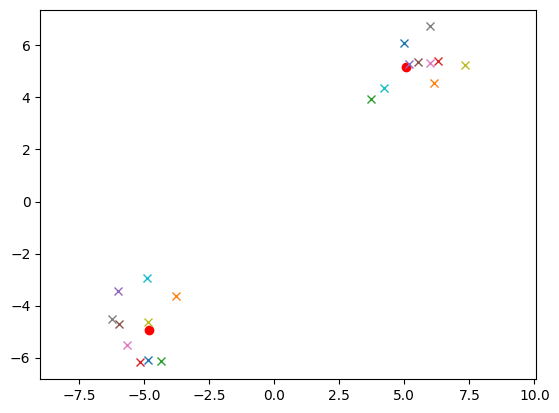

In [83]:
plt.plot(np.stack((x_1, x_2)),  np.stack((y_1, y_2)), 'x')


# get the two clusters out?
c_1 = centers[0]
c_2 = centers[1]
plt.scatter(c_1[0],c_1[1], color='red')
plt.scatter(c_2[0],c_2[1], color='red')


plt.axis('equal')
plt.show()